In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/text_classification

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, GlobalMaxPooling1D

In [0]:
from pandas import read_csv
df = read_csv('processedDataset.csv',names=['text','target'],error_bad_lines=False,encoding='utf-8')
df = df.dropna()

In [0]:
from sklearn import model_selection
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text'],df['target'],test_size=0.25,random_state=101)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(Train_X)
sequences = tok.texts_to_sequences(Train_X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(Test_X)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [0]:
max_features = 5000
maxlen = 150
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250

In [0]:
print('Build model...')

model = Sequential()
model.add(Embedding(max_features,embedding_dims,input_length=maxlen))
model.add(Dropout(0.2))

model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.summary()

Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 148, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)            

In [0]:
op = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy',optimizer=op,metrics=['accuracy'])

history =  model.fit(sequences_matrix,Train_Y,batch_size=32,epochs=50,validation_data=(test_sequences_matrix, Test_Y),validation_split=0.2,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 54357 samples, validate on 54358 samples
Epoch 1/50





54357/54357 [==============================] - 25s 456us/step - loss: 0.8110 - acc: 0.6821 - val_loss: 0.3709 - val_acc: 0.8778
Epoch 2/50
54357/54357 [==============================] - 24s 447us/step - loss: 0.2898 - acc: 0.9047 - val_loss: 0.2345 - val_acc: 0.9233
Epoch 3/50
54357/54357 [==============================] - 24s 450us/step - loss: 0.2237 - acc: 0.9262 - val_loss: 0.2108 - val_acc: 0.9299
Epoch 4/50
54357/54357 [==============================] - 25s 454us/step - loss: 0.1994 - acc: 0.9340 - val_loss: 0.1997 - val_acc: 0.9336
Epoch 5/50
54357/54357 [==============================] - 24s 450us/step - loss: 0.1855 - acc: 0.9384 - val_loss: 0.1945 - val_acc: 0.9357
Epoch 6/50
54357/54357 [==============================] - 26s 478us/step - loss: 0.1753 - acc: 0.9412 - val_loss: 0.1882 - val_acc: 0.9379
Epoch 7/50
5

In [0]:
print (np.argmax(model.predict([[test_sequences_matrix[1]]],batch_size=1,verbose = 2)[0]))
print (Test_Y[1])

4
4


In [0]:
from keras.models import load_model

model.save('cnn_model.h5') 

In [0]:
import pickle

# saving
with open('tokenizer_cnn.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.37086931261809625, 0.2345007415640902, 0.21080552062200014, 0.19973578578264642, 0.19446553100576078, 0.18824065953176225, 0.19021956538881238, 0.18152051567954555, 0.1804053394557791, 0.1825639883084313, 0.1794802216541785, 0.18453539402271993, 0.18046987568423326, 0.17913218547915505, 0.1802701747326658, 0.18165122624716268, 0.18412780334240353, 0.1830984757596164, 0.1885461965544632, 0.1887263285825464, 0.19013215420545826, 0.1881291277221687, 0.19117878414582212, 0.1933360655031929, 0.19510305437954537, 0.1964043221789075, 0.19951207714737912, 0.20704863701962692, 0.2038928643921655, 0.20849152226499257, 0.20943502111234263, 0.21228137436844777, 0.21589480043186768, 0.22130256185242375, 0.22268427808726318, 0.2269152888434083, 0.23006896514561637, 0.2378460067711926, 0.23688761101187003, 0.24491669870131072, 0.24924267171330236, 0.24583915110286572, 0.25367571253836246, 0.2540951980070722, 0.25863557354479544, 0.2612

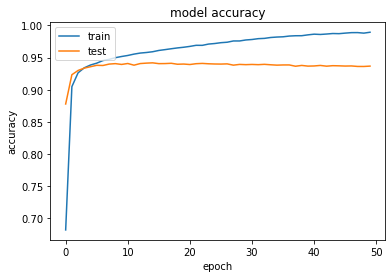

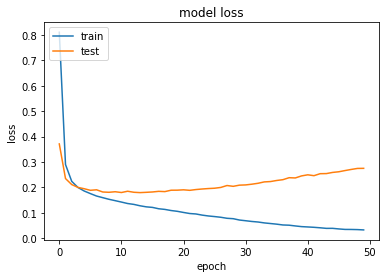

<Figure size 432x288 with 0 Axes>

In [0]:
print(history.history.keys())
# summarize history for accuracy
print (history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('cnn_acc.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('cnn_loss.png')